In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd 
df_img = pd.read_pickle("/content/gdrive/MyDrive/TICNN_Implementation/TICNN/df_final_new.pkl")

In [3]:
import numpy as np

In [4]:
Y=df_img['type']
X=df_img.loc[ : , df_img.columns != 'type']

In [5]:
df_img.columns

Index(['main_img_url', 'text', 'title', 'type', 'caps_title', 'caps_thread',
       'caps_text', 'title_len', 'thread_len', 'text_len', 'excl_title',
       'excl_thread', 'excl_text', 'first_title', 'first_thread', 'first_text',
       'second_title', 'second_thread', 'second_text', 'third_title',
       'third_thread', 'third_text', 'anger', 'anticipation', 'disgust',
       'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative', 'positive',
       'first_all', 'second_all', 'third_all', 'face_count', 'width', 'height',
       'image_name', 'img_vec', 'final_text'],
      dtype='object')

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_comb, y_train, y_comb = train_test_split(X, Y, test_size=0.4,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_comb, y_comb, test_size=0.5,random_state=42)

In [7]:
X_train_img_latent=X_train['img_vec']
X_train_img_explicit=X_train.loc[:, ['face_count', 'width', 'height']]
X_train_text_latent=X_train.loc[:, ['text']]
X_train_title_latent=X_train.loc[:, ['title']]
X_train_text_explicit=X_train.loc[:, ['caps_title', 'caps_thread',
       'caps_text', 'title_len', 'thread_len', 'text_len', 'excl_title',
       'excl_thread', 'excl_text', 'first_title', 'first_thread', 'first_text',
       'second_title', 'second_thread', 'second_text', 'third_title',
       'third_thread', 'third_text', 'anger', 'anticipation', 'disgust',
       'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative', 'positive',
       'first_all', 'second_all', 'third_all']]
X_test_img_latent=X_test['img_vec']
X_test_img_explicit=X_test.loc[:, ['face_count', 'width', 'height']]
X_test_text_latent=X_test.loc[:, ['text']]
X_test_title_latent=X_test.loc[:, ['title']]
X_test_text_explicit=X_test.loc[:, ['caps_title', 'caps_thread',
       'caps_text', 'title_len', 'thread_len', 'text_len', 'excl_title',
       'excl_thread', 'excl_text', 'first_title', 'first_thread', 'first_text',
       'second_title', 'second_thread', 'second_text', 'third_title',
       'third_thread', 'third_text', 'anger', 'anticipation', 'disgust',
       'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative', 'positive',
       'first_all', 'second_all', 'third_all']]
X_val_img_latent=X_val['img_vec']
X_val_img_explicit=X_val.loc[:, ['face_count', 'width', 'height']]
X_val_text_latent=X_val.loc[:, ['text']]
X_val_title_latent=X_val.loc[:, ['title']]
X_val_text_explicit=X_val.loc[:, ['caps_title', 'caps_thread',
       'caps_text', 'title_len', 'thread_len', 'text_len', 'excl_title',
       'excl_thread', 'excl_text', 'first_title', 'first_thread', 'first_text',
       'second_title', 'second_thread', 'second_text', 'third_title',
       'third_thread', 'third_text', 'anger', 'anticipation', 'disgust',
       'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative', 'positive',
       'first_all', 'second_all', 'third_all']]

In [8]:
import numpy as np


X_train_img_explicit=np.asarray(X_train_img_explicit).astype(np.float32)
X_train_text_explicit=np.asarray(X_train_text_explicit).astype(np.float32)

In [9]:
X_test_img_explicit=np.asarray(X_test_img_explicit).astype(np.float32)
X_test_text_explicit=np.asarray(X_test_text_explicit).astype(np.float32)

In [10]:
X_val_img_explicit=np.asarray(X_val_img_explicit).astype(np.float32)
X_val_text_explicit=np.asarray(X_val_text_explicit).astype(np.float32)

In [11]:
y_train_cp=np.asarray(y_train).astype(np.float32)
y_test_cp=np.asarray(y_test).astype(np.float32)
y_val_cp=np.asarray(y_val).astype(np.float32)

In [12]:
X_train_img_latent= pd.DataFrame(X_train_img_latent)

In [13]:
X_train_img_latent['img_vec'].isnull().sum()

0

In [14]:
img_latent=[]
img_latent=np.array(X_train_img_latent['img_vec'][9527]).reshape(-1,50,50,3)
count=0
for i,row in X_train_img_latent.iterrows():
  if(count>0):
    img_latent=np.vstack([img_latent,np.array(row['img_vec']).reshape(-1,50,50,3)])
  count=count+1

In [15]:
img_latent.shape

(4363, 50, 50, 3)

In [16]:
X_test_img_latent= pd.DataFrame(X_test_img_latent)

In [17]:
X_test_img_latent['img_vec'].isnull().sum()

0

In [18]:
img_test_latent=[]
img_test_latent=np.array(X_test_img_latent['img_vec'][16113]).reshape(-1,50,50,3)
count=0
for i,row in X_test_img_latent.iterrows():
  if(count>0):
    img_test_latent=np.vstack([img_test_latent,np.array(row['img_vec']).reshape(-1,50,50,3)])
  count=count+1

img_test_latent.shape

(1455, 50, 50, 3)

In [19]:
text_latent=[]
text_latent=np.array(X_train_text_latent['text'][9527]).reshape(-1,1000)
count=0
for i,row in X_train_text_latent.iterrows():
  if(count>0):
    text_latent=np.vstack([text_latent,np.array(row['text']).reshape(-1,1000)])
  count=count+1

In [20]:
text_latent.shape

(4363, 1000)

In [21]:
text_test_latent=[]
text_test_latent=np.array(X_test_text_latent['text'][16113]).reshape(-1,1000)
count=0
for i,row in X_test_text_latent.iterrows():
  if(count>0):
    text_test_latent=np.vstack([text_test_latent,np.array(row['text']).reshape(-1,1000)])
  count=count+1

In [22]:
text_test_latent.shape

(1455, 1000)

In [23]:
title_latent=[]
title_latent=np.array(X_train_title_latent['title'][9527]).reshape(-1,93)
count=0
for i,row in X_train_title_latent.iterrows():
  if(count>0):
    title_latent=np.vstack([title_latent,np.array(row['title']).reshape(-1,93)])
  count=count+1

In [24]:
title_latent.shape

(4363, 93)

In [25]:
title_test_latent=[]
title_test_latent=np.array(X_test_title_latent['title'][16113]).reshape(-1,93)
count=0
for i,row in X_test_title_latent.iterrows():
  if(count>0):
    title_test_latent=np.vstack([title_test_latent,np.array(row['title']).reshape(-1,93)])
  count=count+1

In [26]:
title_test_latent.shape

(1455, 93)

In [27]:
X_val_img_latent= pd.DataFrame(X_val_img_latent)

In [28]:
X_val_img_latent['img_vec'].isnull().sum()

0

In [29]:
img_val_latent=[]
img_val_latent=np.array(X_val_img_latent['img_vec'][15619]).reshape(-1,50,50,3)
count=0
for i,row in X_val_img_latent.iterrows():
  if(count>0):
    img_val_latent=np.vstack([img_val_latent,np.array(row['img_vec']).reshape(-1,50,50,3)])
  count=count+1

img_val_latent.shape

(1454, 50, 50, 3)

In [30]:
text_val_latent=[]
text_val_latent=np.array(X_val_text_latent['text'][15619]).reshape(-1,1000)
count=0
for i,row in X_val_text_latent.iterrows():
  if(count>0):
    text_val_latent=np.vstack([text_val_latent,np.array(row['text']).reshape(-1,1000)])
  count=count+1

In [31]:
text_val_latent.shape

(1454, 1000)

In [32]:
title_val_latent=[]
title_val_latent=np.array(X_val_title_latent['title'][15619]).reshape(-1,93)
count=0
for i,row in X_val_title_latent.iterrows():
  if(count>0):
    title_val_latent=np.vstack([title_val_latent,np.array(row['title']).reshape(-1,93)])
  count=count+1

In [33]:
title_val_latent.shape

(1454, 93)

In [34]:
from keras.models import model_from_json,load_model
from keras.optimizers import Adam


opt = Adam(lr=1e-3, decay=1e-3 / 200)
model_path="/content/gdrive/MyDrive/TICNN_Implementation/TICNN-TITLE-1000/model_combined_final_5.h5"
model_js_path="/content/gdrive/MyDrive/TICNN_Implementation/TICNN-TITLE-1000/model_combined_final_5.json"
# load json and create model
json_file = open(model_js_path, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(model_path)
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


Loaded model from disk


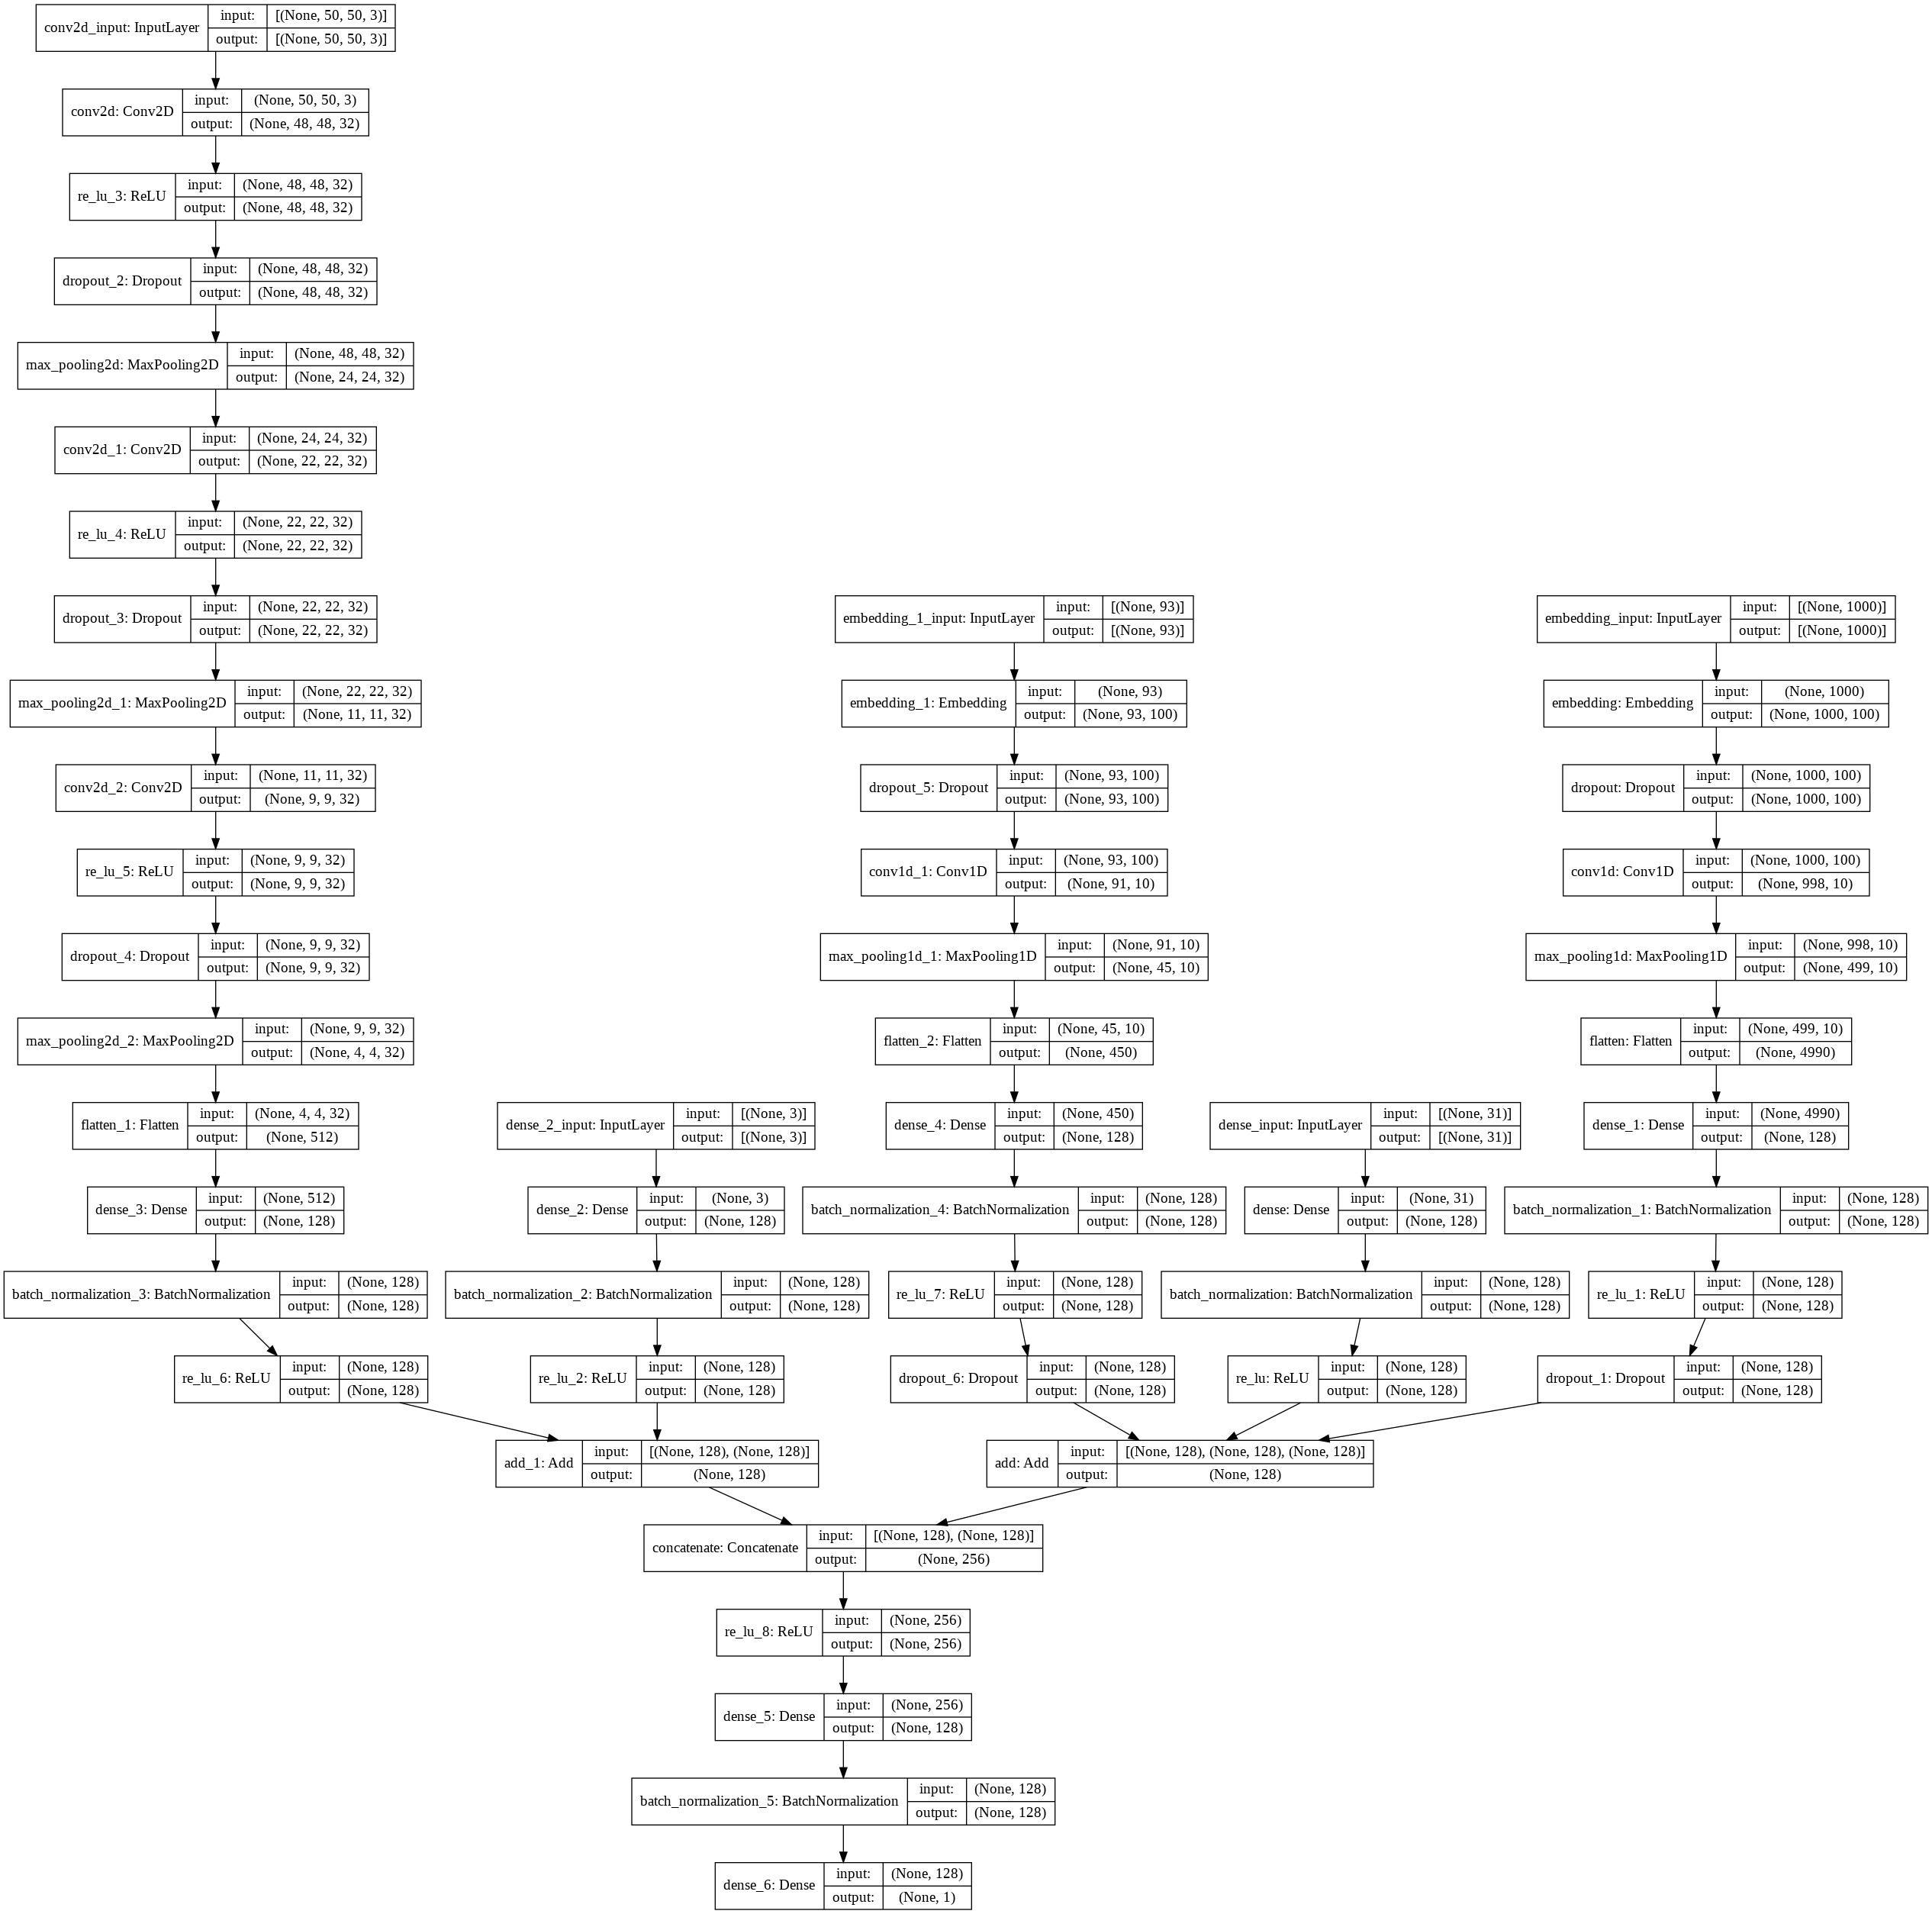

In [35]:
from keras.utils.vis_utils import plot_model
plot_model(loaded_model,show_shapes=True, show_layer_names=True)

In [36]:
y_test.value_counts()

1.0    931
0.0    524
Name: type, dtype: int64

In [37]:
y_pred=loaded_model.predict([X_test_text_explicit,text_test_latent,title_test_latent,X_test_img_explicit,img_test_latent])

In [38]:
y_pred = (y_pred>=0.5)*1

In [39]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
precision = precision_score(y_test.values, y_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test.values,y_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test.values, y_pred)
print('Precision is:'+str(precision))
print('Recall is:'+str(recall))
print('F1 score is:'+str(f1))
print('Accuracy is:'+str(accuracy_score(y_test.values,y_pred)))

Precision is:0.9925133689839573
Recall is:0.9967776584317938
F1 score is:0.9946409431939978
Accuracy is:0.993127147766323


In [40]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test.values, y_pred)

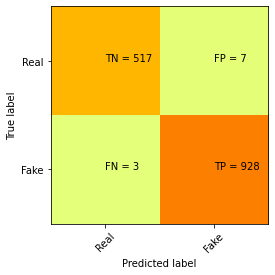

In [41]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Real','Fake']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [42]:
result = np.absolute(np.asarray(y_test).reshape(1455,-1)-y_pred)

In [43]:
result=pd.DataFrame(result,index=y_test.index)

In [44]:
# List of misclassified points

result[result[0]==1]

,0
3396,1.0
10560,1.0
2001,1.0
3286,1.0
8746,1.0
3453,1.0
241,1.0
2710,1.0
8752,1.0
467,1.0


The point was rightly classified as: Real


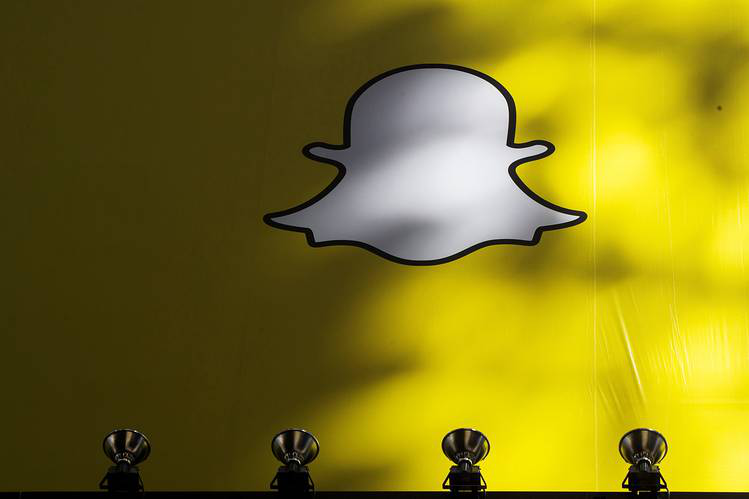

In [45]:
from PIL import Image as im
import os

# Some sample points for demo
num=1272
path = "/content/gdrive/MyDrive/TICNN_Implementation/INITIAL_PREPROCESSING/images"
if (result.loc[num][0]==0.0):
  if (y_test.loc[num]==1.0):
    print('The point was rightly classified as: Fake')
  else:
    print('The point was rightly classified as: Real')
else:
  if (y_test.loc[num]==1.0):
    print('The point was wrongly classified and it was originally : Fake')
  else:
    print('The point was wrongly classified and it was originally : Real')
image_path=str(num)+'.png'
input_path = os.path.join(path, image_path)
data = im.open(input_path)
data

In [46]:
df_img.loc[num]['main_img_url']

'https://si.wsj.net/public/resources/images/BN-QV282_cmosna_P_20161116063539.jpg'

The point was rightly classified as: Fake


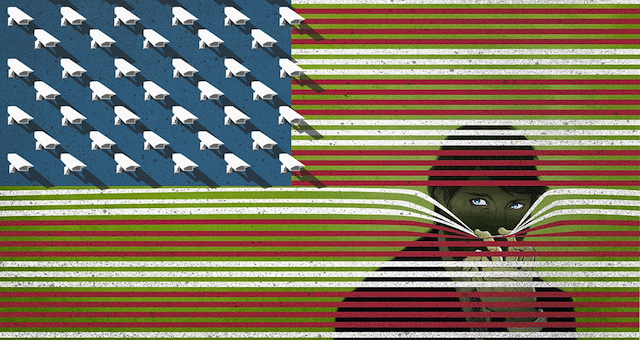

In [47]:
from PIL import Image as im
import os

num=16113
path = "/content/gdrive/MyDrive/TICNN_Implementation/INITIAL_PREPROCESSING/images"
if (result.loc[num][0]==0.0):
  if (y_test.loc[num]==1.0):
    print('The point was rightly classified as: Fake')
  else:
    print('The point was rightly classified as: Real')
else:
  if (y_test.loc[num]==1.0):
    print('The point was wrongly classified and it was originally : Fake')
  else:
    print('The point was wrongly classified and it was originally : Real')
image_path=str(num)+'.png'
input_path = os.path.join(path, image_path)
data = im.open(input_path)
data

In [48]:
df_img.loc[num]['main_img_url']

'http://www.wakingtimes.com/wp-content/uploads/2016/10/Surveillance-1.png'

The point was wrongly classified and it was originally : Real


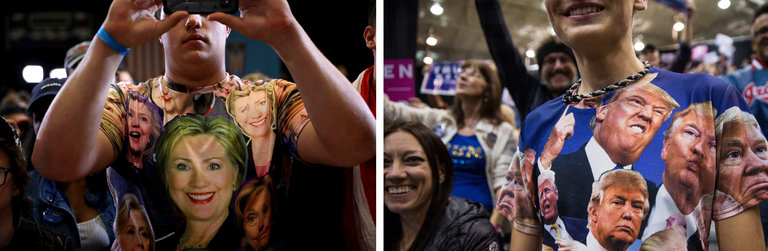

In [49]:
from PIL import Image as im
import os

num=3396
path = "/content/gdrive/MyDrive/TICNN_Implementation/INITIAL_PREPROCESSING/images"
if (result.loc[num][0]==0.0):
  if (y_test.loc[num]==1.0):
    print('The point was rightly classified as: Fake')
  else:
    print('The point was rightly classified as: Real')
else:
  if (y_test.loc[num]==1.0):
    print('The point was wrongly classified and it was originally : Fake')
  else:
    print('The point was wrongly classified and it was originally : Real')
image_path=str(num)+'.png'
input_path = os.path.join(path, image_path)
data = im.open(input_path)
data

In [50]:
df_img.loc[num]['main_img_url']

'https://static01.nyt.com/images/2016/11/03/upshot/03UP-POlls/03UP-POlls-master768.jpg'

The point was wrongly classified and it was originally : Real


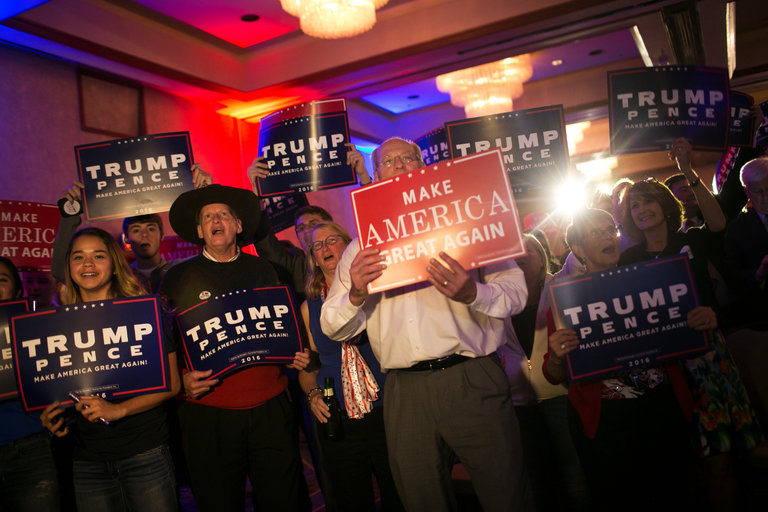

In [51]:
from PIL import Image as im
import os

num=241
path = "/content/gdrive/MyDrive/TICNN_Implementation/INITIAL_PREPROCESSING/images"
if (result.loc[num][0]==0.0):
  if (y_test.loc[num]==1.0):
    print('The point was rightly classified as: Fake')
  else:
    print('The point was rightly classified as: Real')
else:
  if (y_test.loc[num]==1.0):
    print('The point was wrongly classified and it was originally : Fake')
  else:
    print('The point was wrongly classified and it was originally : Real')
image_path=str(num)+'.png'
input_path = os.path.join(path, image_path)
data = im.open(input_path)
data

In [52]:
df_img.loc[num]['main_img_url']

'https://static01.nyt.com/images/2016/11/10/world/10Int-Populism/10Int-Populism-master768.jpg'